# Example 6a: Using the Area of Review (AoR) Workflow in an NRAP-Open-IAM Control File Simulation.

This example demonstrates how to use the AoR plot type in the Control File Interface. Specifically, this example examines the setup of the .yaml file for Control File Example 56d (ControlFile_ex56d.yaml) as well as the example's output. The figures and .csv files produced show the extent of pressure and CO$_2$ saturation plumes within reservoir resulting from the injection operation as well as the aquifer impact that could occur if hypothetical open wellbores (i.e., uncemented) were distributed across the domain. By examing the pressure, saturation, and different aquifer impact metric plumes that could arise if open leakage pathways were present (a worst-case scenario offering a conservatively high portrayal of leakage risks), one can use the results to inform the extent of the site's AoR.

The present control file example creates a map-view figure showing where reservoir pressures exceed the local critical pressure (i.e., the pressure required to drive brine leakage into the aquifer considered given the parameters and stratigraphy used). Another figure shows the TDS plume volumes that could occur in the aquifer if leakage pathways were present. The AoR Workflow also creates an overall AoR reflecting different metrics (pressure and CO$_2$ saturation in the reservoir as well as pH and TDS plume volumes in the aquifer considered, aquifer 4).

Note that before this example can be run, one need to have the OpenIAMEnv environment activated (environment containing the python libraries required to run NRAP-Open-IAM). For example, one can open Anaconda Prompt, use the command "conda activate OpenIAMEnv" to activate the environment, navigate to the directory for NRAP-Open-IAM, and then use the command "jupyter notebook" to open Jupyter Notebook from that directory and within that environment. Then, the jupyter notebook examples will have access to the Python libraries within NRAP-Open-IAM environment.

Now, we review the different sections of the .yaml control file. Control files will typically use the pound symbol followed by hyphens (#---) to mark separate sections, but these characters are not required. Any symbols following a pound symbol (#) will be ignored by the Python script that reads the .yaml file, so the pound symbols and hyphens are only there to provide some comments or divide the control file into logical parts. 

Every control file must have a section called 'ModelParams'. In this section, one specifies the model times to assess ('EndTime: 20' and 'TimeStep: 1.0', times are in years), the type of analysis to conduct (i.e., deterministic or stochastic, controlled by the 'Analysis' entry), the names of the components included in the system model ('Components'), and the output directory to save the output ('OutputDirectory').

Here, the analysis type is forward, or a so called deterministic simulation (i.e., results will be the same each time the simulation is run). The list of components is actually empty ('Components: [ ]'); this approach is not typical for a control file, and only works when using a Workflow that can automatically handle such matters. We discuss such considerations further below.

Next, the control file specifies the stratigraphy of the model domain. Unit thicknesses are in meters. In NRAP-Open-IAM, shales and aquifer units always alternate and higher unit numbers are closer to the surface. Therefore, shale 3 (shale3Thickness) is just above aquifer 2 (aquifer2Thickness) and aquifer 2 is above shale 2 (shale2Thickness). Shale 1 (shale1Thickness) is a shale layer above the storage reservoir (reservoirThickness).

The only other section the control file contains is the Workflow section. In the control file interface, a Workflow can automate the setup of components and plots. In contrast, in a normal control file one must manually set up the sections for each component and plot. Workflow automation was created to minimize the effort required to run specific analyses. The delineation of AoRs is likely to be a common usage of NRAP-Open-IAM, so this analysis should be as convenient as possible. Additionally, this automation can prevent the occurence of common errors. For example, in a common control file the user must type component names in multiple locations (e.g., in the 'Components' list in the 'ModelParams' section, in the component's own section, and in the sections for any connected components). A typo or a slight formatting error could cause the simulation to fail.

The Workflow type is specified through the entry 'Type: AoR', which is indented under 'Workflow'. All other information for the simulation is entered under the 'Options' entry.

We show the entire Workflow section here, but further below we focus on specific entries in the 'Options' section. Note that all text following the pound symbol ('#') will be ignored by the Python script that reads the control file. The text following any '#' symbol is provided to help guide the user.

Most of the entries indented under 'Options' control the types and parameterizations of the components used ('ReservoirComponentType', 'ReservoirOptions', 'WellboreOptions', and 'AquiferComponentType'). We examine these entries further below.

The 'TimeList: All' entry specifies that a figure will be made for every model time. For example, separate figures will show where the reservoir pressures exceed the critical pressure every year from zero to 10 years.

The 'CriticalPressureMPa' entry controls the handling of critical pressure in the map-view figure showing reservoir pressures. If the simuation uses an OpenWellbore component, the 'CriticalPressureMa' entry also sets the critical pressure used by the OpenWellbore component. CriticalPressureMPa can be given as a specific pressure in MPa or as 'Calculated'. When 'Calculated' is entered, the critical pressure is calculated based on the stratigraphy and parameter values of the wellbore component. In this example the critical pressure is given as 23.5 MPa.

Here, an AnalyticalReservoir component is used to portray reservoir conditions over time ('ReservoirComponentType: AnalyticalReservoir').

Parameter values for the AnalyticalReservoir component are given under 'Parameters', which is indented under 'ReservoirOptions. The injection rate is given as 0.33 m$^3$ s$^{-1}$ ('injRate: 0.33') while the reservoir permeability is given as -13.0 log$_{10}$ m$^2$. The reservoirRadius represents the distance between the injection well and the outer reservoir boundary. This radius should not be smaller than the distance between the injection site and any well locations used. The brineResSaturation represents the residual saturation of the brine phase.

The entry 'WellboreComponentType' is not provided, so the default OpenWellbore component will be used. While it is unlikely that unknown legacy wells near the site will be completely uncemented, this approach is intended to examine how significant the aquifer impacts could be in a worst-case scenario where open wellbores are distributed across the domain.

The x and y coordinates for the hypothetical wellbores can be specified through a 'Locations' entry indented under 'WellboreOptions'. There is no 'Locations' entry under 'WellboreOptions' in this example, however, so the default locations will be used for the wellbores. The x and y values (easting and northing distances) will vary from -50 km to 50 km in a (6 x 6) grid, providing a total of 36 points.

Certain parameter values for the OpenWellbore component are specified under 'WellboreOptions: Parameters'. Such parameters include the well radius ('wellRadius: 0.05', in meters), the transmissivity values of the reservoir and aquifer ('logReservoirTransmissivity' and 'logAquiferTransmissivity', in log$_{10}$ m$^3$), and the salinity of the brine in the reservoir ('brineSalinity', dimensionless).

The entry 'AquiferName: aquifer2' specifies that the wellbores will leak into aquifer 2. In this simulation, aquifer 2 is only separated from the surface by shale 3.

The entry 'AquiferName: aquifer2' also specifies that the aquifer components will be made to represent aquifer 2. This assignment allows certain parameters of the aquifer component to be assigned automatically, like the aquifer's thickness and depth. If the 'AquiferName' entry is not provided, the default approach for the AoR Workflow is to use the highest aquifer unit.

The entry 'AquiferComponentType: FutureGen2Aquifer' specifies that a FutureGen2Aquifer component will be used. No parameter values are specified for the aquifer component, so default parameter values will be used. If users wanted to specify parameter values, however, they would enter them under a 'Parameters' section indentend under 'AquiferOptions', which would in turn be indented under 'Options' (i.e., the same approach used to set the reservoir and wellbore parameters).

When running the AoR Workflow, one does not have to specify the outputs of each component. All of the outputs required for AoR analyses will be included automatically.

When the control file is run, the AoR Workflow will produce multiple map-view figures. These figures show the reservoir pressures, CO$_2$ saturations, pH plume volumes, and TDS plume volumes across the domain at different model times. Each point shown is a hypothetical wellbore location, and the plume volumes shown are those that could occur if an uncemented wellbore was located there. The figures also show an overall AoR that reflects all four of the metrics considered.

All results will be saved in .csv files. Running an NRAP-Open-IAM control file depends on the type of computer used and how it was installed; for more information, see section 1.3 of the User Guide ('Installing NRAP-Open-IAM'). A control file is normally run through a command prompt (e.g., Anaconda Prompt on Anaconda Navigator). Below, we run control file example 56b through a script-based approach.

Note that this simulation will take some time to run (e.g., about one to two minutes). The output will be saved to a folder called 'output_ex56d_jupyter' in the 'output' folder of the NRAP-Open-IAM directory. The control file interface will print messages regarding the status of the simulation (e.g., 'Running file' or 'Analysis completed'). Once the simulation has finished and the TTFD plots are being made, you can watch the figures appear in the 'output_ex56d_jupyter' folder. Once the AoR Workflow has finished, the code below will print the statement 'Finished'.

Note that the version of control file example 56d used ('ControlFile_ex56d_jupyter.yaml') has been modified relative to the normal version ('ControlFile_ex56d.yaml'). First, the normal version uses Latin Hypercube Sampling (LHS) to evaluate 50 realizations varying the logResPerm parameter of the AnalyticalReservoir. This version uses a forward model with one realization to reduce the simulation's run time. Second, the output directory has been changed to make accessing the output more convenient (i.e., the folder name will not contain the time stamp, i.e., the exact time at which it was created) 

While running, the simulation will print warning statements if entry Logging in the ModelParams section is set to Debug or Warning. For example, it will print statements saying 'Scaling below minimum saturation of 0.01'; the minimum CO$_2$ saturation expected by the OpenWellbore component is 0.01, but many values from the AnalyticalReservoir component will be zero.

In [1]:
import sys
import os

# Add the source folder to the path
sys.path.insert(0, os.sep.join(['..', '..', 'src']))

# Name of the control file
file_name = 'ControlFile_ex56d_jupyter.yaml'

file_path = os.path.join(os.getcwd(), '..', 'Control_Files', 
                         'examples_for_jupyter_notebook', file_name)

source_dir = os.path.join(os.getcwd(), '..', '..', 'src')

# Path to the file openiam_cf.py, which is used to run control files
run_file = os.path.join(source_dir, 'openiam', 'components', 'openiam_cf.py')

# Set up the command to run the control file.
run_command = '"{0}" --file "{1}"'.format(
     run_file, file_path)

In [2]:
print('Running Control File example 56d...')

# Run the control file
%run -i $run_command

print('Finished.')

Running Control File example 56d...

Finished.


Now, wait for the control file to finish running. Even after the main simulation is finished, the AoR analysis will continue to run for some time. When it is finished, the code above will print the statement 'Finished'.

After the AoR analysis has finished, run the code below. This code will load and display the five figures produced by control file example 55b. If you run this code before running the example, it will print a statement saying that the figure cannot be found.

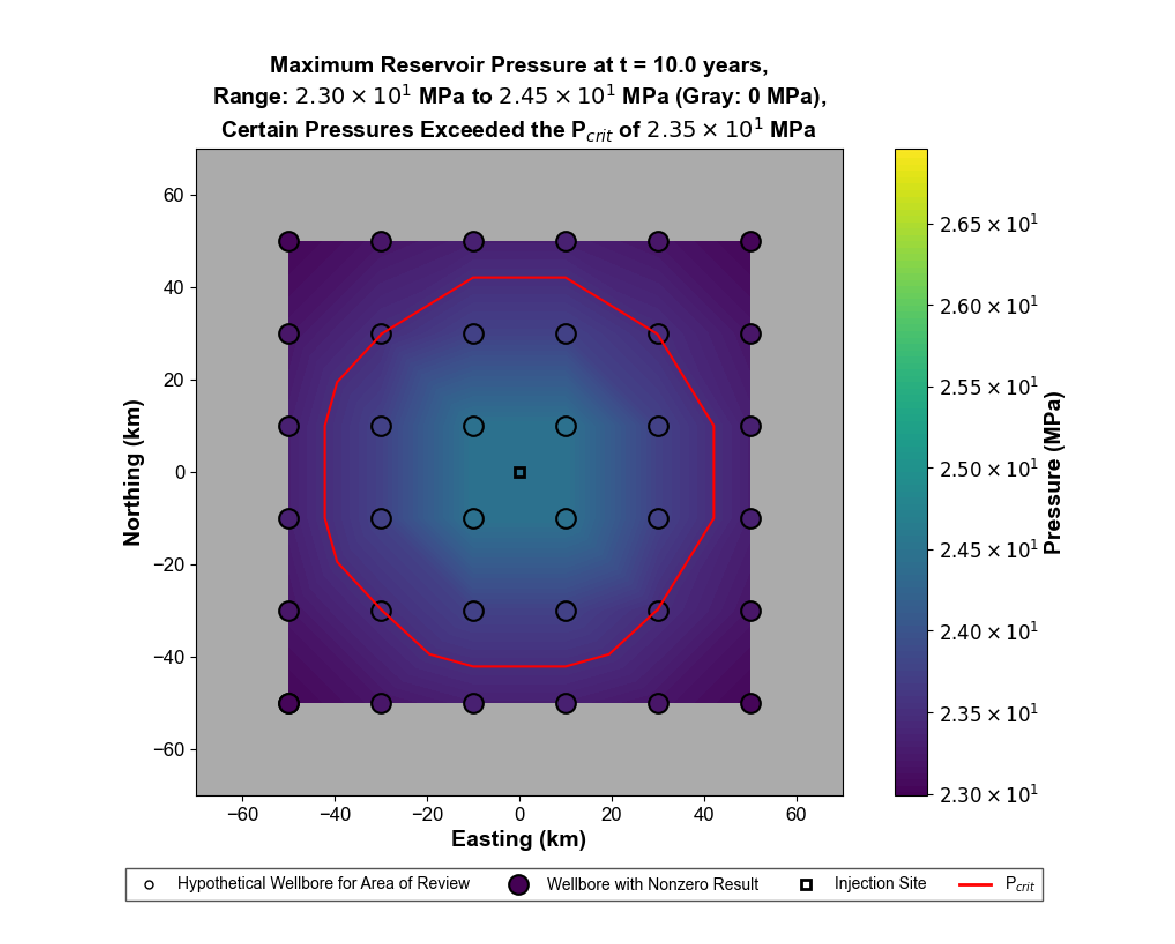

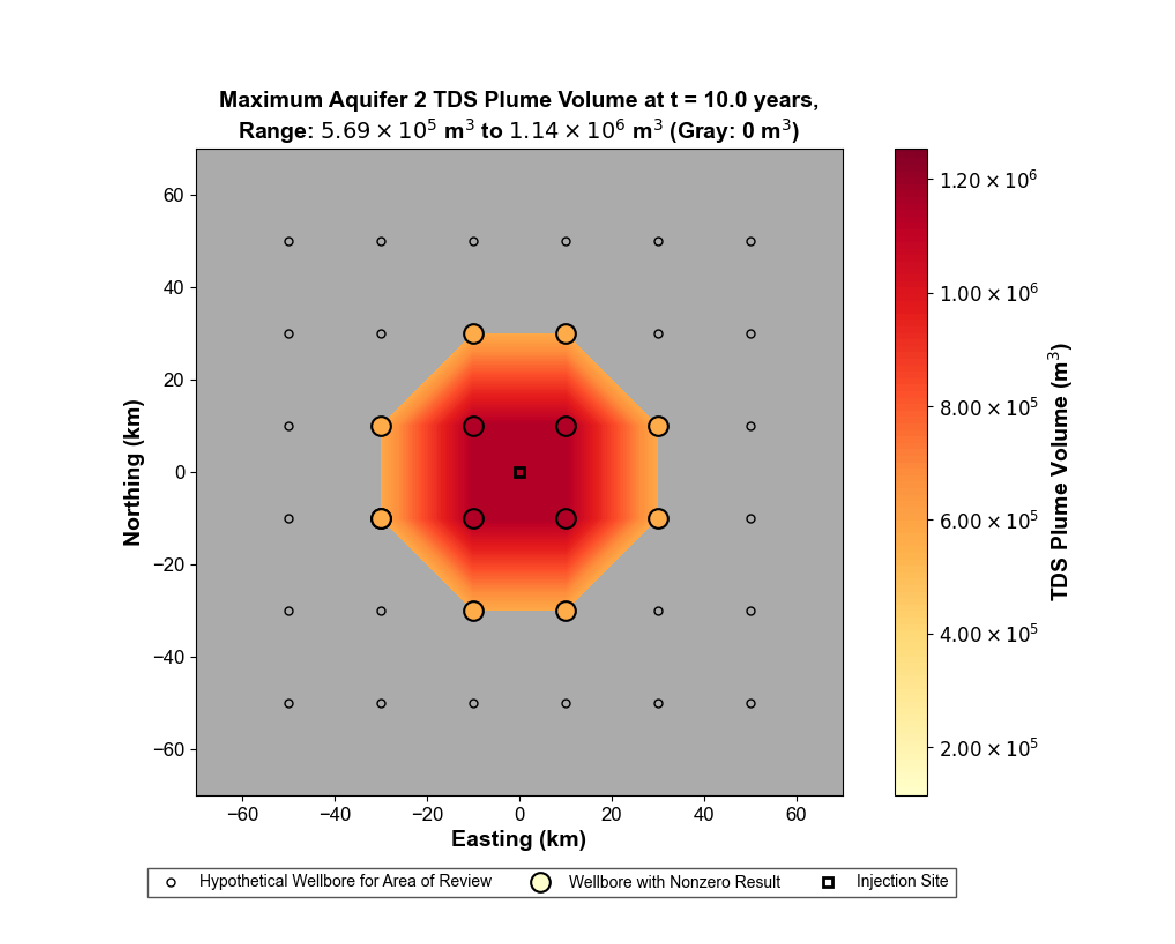

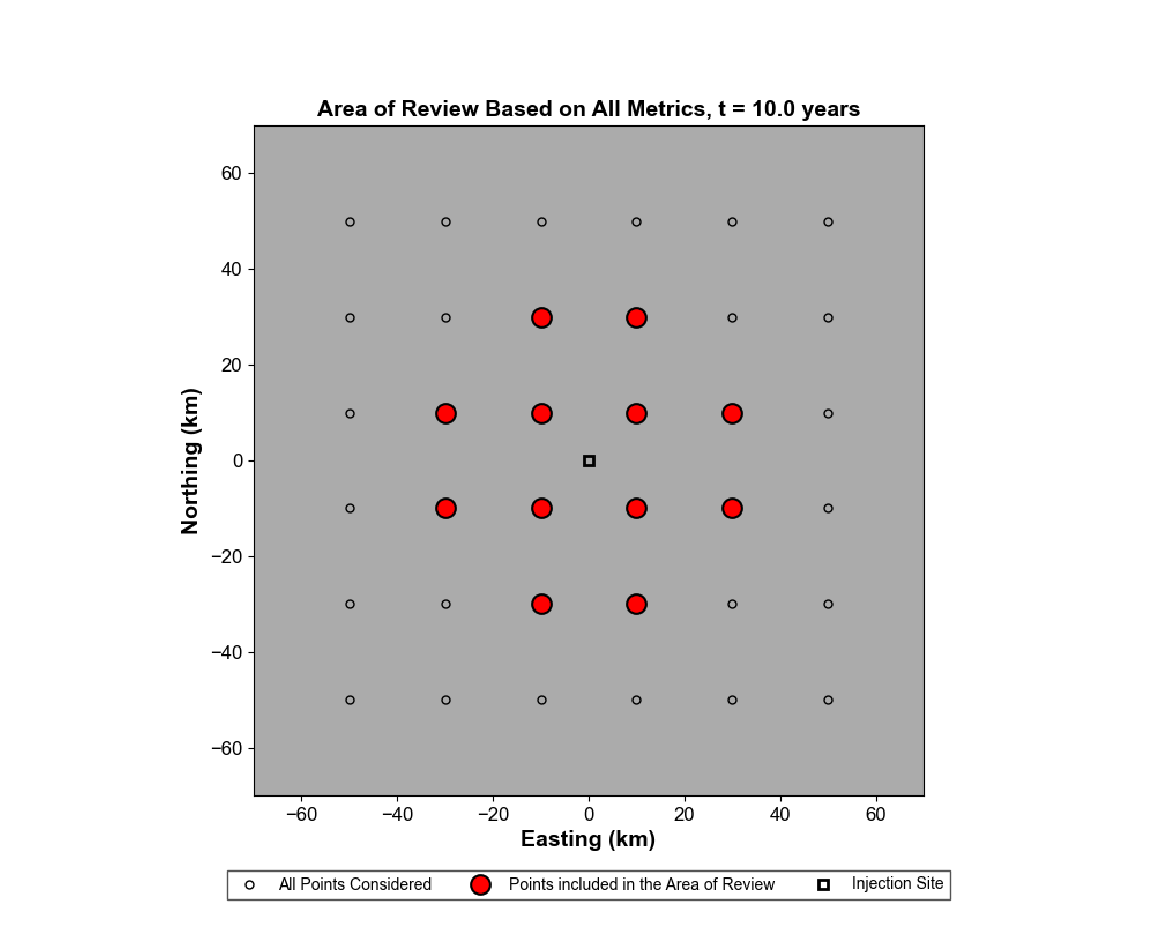

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

figure_names = ['Pressure_Plot_tIndex_1.png', 'Pressure_Plot_tIndex_5.png',
                'Pressure_Plot_tIndex_10.png', 'Aq_Brine_Impact_Plot_tIndex_1.png',
                'Aq_Brine_Impact_Plot_tIndex_5.png', 'Aq_Brine_Impact_Plot_tIndex_10.png',
                'CO2_Saturation_Plot_tIndex_10.png', 'Aq_CO2_Impact_Plot_tIndex_10.png',
                'AoR_Workflow_Plot_tIndex_1.png', 'AoR_Workflow_Plot_tIndex_5.png',
                'AoR_Workflow_Plot_tIndex_10.png']


# To plot all figures change False to True for variable plot_all below
plot_all = False
if plot_all:
    fig_indices = range(len(figure_names))
else:
    fig_indices = [2, 5, 10]

output_folder = os.path.join(os.getcwd(), '..', '..', 'output', 'output_ex56d_jupyter')

for figRef in fig_indices:
    file_path = os.path.join(output_folder, figure_names[figRef])
    
    check_for_figure = os.path.exists(file_path)
    
    if check_for_figure:
        img = mpimg.imread(file_path)
        
        fig = plt.figure(figRef + 1, figsize=(15, 12), dpi=100)
        ax = plt.gca()
        
        ax.imshow(img, interpolation='nearest')
        
        # We do not need the ticks from imshow, the figure file has its own ticks
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
        # We also do not need the spline added by imshow
        plt.setp(ax.spines.values(), alpha = 0)
    else:
        print('The figure {} was not found.'.format(file_path))

plt.show()